In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, precision_score
import warnings 
warnings.filterwarnings("ignore")

In [4]:
from nltk.stem import PorterStemmer   #reduceing inflection
from nltk.tokenize import word_tokenize   # word tokenization
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import TfidfVectorizer    # for vectors
from gensim.models import Word2Vec   #for vectors

In [5]:
data = pd.read_csv("train.csv")

In [6]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
data.shape

(20800, 5)

In [8]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
data.fillna(" ",inplace=True)

In [10]:
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
data["label"].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

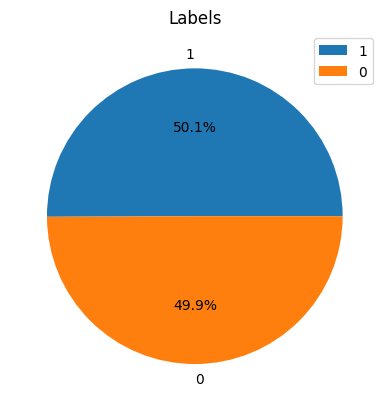

In [12]:
plt.pie(data["label"].value_counts(),autopct="%0.01f%%",labels=[1,0])
plt.legend()
plt.title("Labels")
plt.show()
# From the plot we can declare that the data is labelled

In [13]:
data["content"] = data["author"]+" "+data["title"]

In [14]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [15]:
data.drop(columns=["id","title","author","text"],inplace=True)

In [16]:
data.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [17]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
ps = PorterStemmer()
stopword= stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#---lower case
#---port stemmer
#---stopword remove
def convert(text):
    if isinstance(text, bytes):
            text = text.decode("utf-8")  # Ensure input is a string
    doc = re.sub('[^a-zA-Z"]'," ",text)
    doc = doc.lower()
    doc = " ".join(ps.stem(word)for word in doc.split() if word not in stopword)
    return doc

In [202]:
# def convert(text):
#     """Convert list of texts using preprocessing"""
#     return text.astype(str).apply(lambda text: " ".join(
#         ps.stem(word) for word in re.sub(r'[^a-zA-Z]', " ", text.lower()).split() if word not in stopword
#     ))

In [47]:
data["content"] = data["content"].apply(convert)

In [48]:
x = data["content"].values
y = data["label"].values

In [49]:
tfidf = TfidfVectorizer(max_features=1000)
x_trans = tfidf.fit_transform(x).toarray()

## Builiding Machine Learning Model

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_trans,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.model_selection import cross_val_score

## Gaussian Naive Bayes

In [31]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print("accuracy score with NB is :",accuracy_score(y_pred,y_test))
print("Percision score with NB is :",precision_score(y_pred,y_test))

accuracy score with NB is : 0.911298076923077
Percision score with NB is : 0.8732741617357002


In [32]:
score = cross_val_score(nb,x_train,y_train,cv=5)
print(score.mean())

0.9092548076923077


## Random Forest Ensemble

In [195]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=50)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("accuracy score with Random Forest is :",accuracy_score(y_pred,y_test))
print("Percision score with Random forest is :",precision_score(y_pred,y_test))

accuracy score with Random Forest is : 0.9810096153846154
Percision score with Random forest is : 0.992603550295858


In [197]:
score = cross_val_score(rf,x_train,y_train,cv=5)
print(score.mean())

0.9834134615384615


## Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("accuracy score with logistic Regression is :",accuracy_score(y_pred,y_test))
print("Percision score with Logistic Regression is :",precision_score(y_pred,y_test))

accuracy score with logistic Regression is : 0.9680288461538461
Percision score with Logistic Regression is : 0.9847140039447732


## Hyperparameter Tunning(GridSearchCV)

In [235]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":[40,50,100],
    "max_samples":[0.25,0.5],
    "bootstrap":[True],
    "max_features":[0.1,0.5,1]
}
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1),params,cv=5,scoring="accuracy")
grid.fit(x_trans,y)
print(grid.best_params_)

{'bootstrap': True, 'max_features': 0.1, 'max_samples': 0.5, 'n_estimators': 40}


# Using Pipline and FunctionTransformer

In [91]:
from text_processing import convert 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def process_text(text):
    ps = PorterStemmer()
    stopword= stopwords.words("english")
    text = re.sub(r'[^a-zA-Z"]', " ", text)  # Remove non-alphabetic characters
    text = text.lower()
    text = " ".join(ps.stem(word) for word in text.split() if word not in stopword)
    return text

def convert(text_series):
    """Convert text data by applying stemming and removing stopwords"""
    # Convert list input to Pandas Series
    text_series = pd.Series(text_series) if isinstance(text_series, list) else text_series
    
    return text_series.astype(str).apply(lambda text: process_text(text))

In [92]:
data.head()

,label,content
0,1,darrel lucu hou dem aid even see comey letter ...
1,0,daniel j flynn flynn hillari clinton big woman...
2,1,consortiumnew com truth might get fire
3,1,jessica purkiss civilian kill singl us airstri...
4,1,howard portnoy iranian woman jail fiction unpu...


In [93]:
x1=data["content"]
y1 =data["label"] 

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [95]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [96]:
trans = FunctionTransformer(convert)

In [97]:
pipe = Pipeline([
    ("text_claeaning",trans),
    ("text-vector",TfidfVectorizer()),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
                ])
                

In [98]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("acuracy score is :",accuracy_score(y_pred,y_test))
print("precision score is :",precision_score(y_pred,y_test))

acuracy score is : 0.9923076923076923
precision score is : 0.9940828402366864


## Exporting Pipeline

In [99]:
import pickle
with open("pipeline1.pkl", "wb") as f:
    pickle.dump(pipe, f)

In [239]:
import joblib
joblib.dump(pipe,"fake_news_detection.pkl")

['fake_news_detection.pkl']

# Using LSTM

In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def create_lstm_model(max_words=5000, max_len=100, embedding_dim=100):
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_len),
        SpatialDropout1D(0.2),
        LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
tokenizer = Tokenizer(num_words=5000)


def preprocess_text(texts):
    """Tokenize text data"""
    return tokenizer.texts_to_sequences(texts)
    

pipe = Pipeline([
    ("text_cleaning", FunctionTransformer()),  # Preprocess text
    ("classifier", KerasClassifier(model=create_lstm_model, epochs=3, batch_size=32, verbose=1))
])